<!DOCTYPE html>
<html>
<head>
    <title>Introduction</title>
</head>
<body>
    <h1>Name: [Begad Tamim]</h1>
    <h2>Registration Number: [211002177]</h2>
    <h3>Project: [Lane And Curve Detection]</h3>
    <h4>Supervised By: [Engineer Alia EL Hefny, Engineer Ahmed Metwalli]</h4>
</body>
</html>

## Libraries and Modules


In [5]:
import random
import pickle
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dropout, UpSampling2D
from tensorflow.keras.models import load_model
from skimage.measure import label, regionprops
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## CNN Model Architecture


In [6]:
def create_model(input_shape, pool_size):
    # Create a Sequential model
    model = Sequential()
    
    # Normalizes incoming inputs. First layer needs the input shape
    model.add(BatchNormalization(input_shape=input_shape))

    # Convolutional Layers
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # Pooling Layer
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # Pooling Layer 2
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # Pooling Layer 3
    model.add(MaxPooling2D(pool_size=pool_size))

    # Upsampling Layer
    model.add(UpSampling2D(size=pool_size))

    # Deconvolution Layers
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # Upsampling Layer 2
    model.add(UpSampling2D(size=pool_size))

    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # Upsampling Layer 3
    model.add(UpSampling2D(size=pool_size))

    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # Final Convolutional Layer
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model

## Load Labels and Training Data


In [7]:
# Load the labels from the pickle file
pd.read_pickle('full_CNN_labels.p')

[array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
      

In [8]:
# Display the shape of the labels
np.shape(_)

(12764, 80, 160, 1)

In [9]:
# Load the training data
l=pickle.load(open("full_CNN_train.p", "rb" ))
np.shape(l)

(12764, 80, 160, 3)

In [10]:
# Display the shape and content of the first element in the training data
for i in l:
    print(np.shape(i))
    print(i)
    temp = i
    break

(80, 160, 3)
[[[ 7  5  3]
  [ 7  3  2]
  [ 7  2  2]
  ...
  [ 2  1  0]
  [ 3  0  0]
  [ 3  0  0]]

 [[ 7  5  5]
  [ 7  3  4]
  [ 7  4  5]
  ...
  [ 1  1  1]
  [ 2  1  0]
  [ 2  1  0]]

 [[ 6  3  4]
  [ 8  4  5]
  [ 7  5  6]
  ...
  [ 1  2  1]
  [ 1  1  0]
  [ 1  1  0]]

 ...

 [[23  8  9]
  [22  7  9]
  [24  5  9]
  ...
  [59 42 36]
  [60 41 36]
  [59 39 34]]

 [[20  4  6]
  [19  5  6]
  [19  5  4]
  ...
  [47 32 28]
  [48 31 29]
  [50 32 29]]

 [[20  4  5]
  [19  5  5]
  [19  5  2]
  ...
  [39 24 21]
  [40 24 25]
  [42 26 27]]]


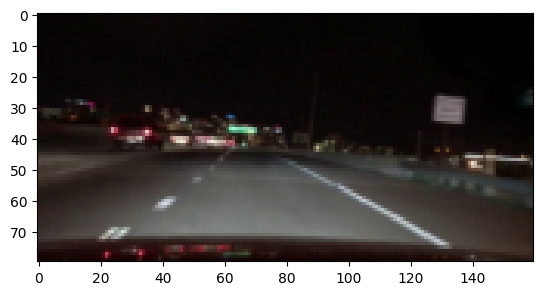

In [11]:
# Visualize the first element in the training data
plt.imshow(temp)
plt.show()

In [12]:
# Reshape the training data
temp = temp.reshape(160, 240)

In [13]:
# Load training images
train_images = pickle.load(open("full_CNN_train.p", "rb" ))

# Load image labels
labels = pickle.load(open("full_CNN_labels.p", "rb" ))

In [14]:
# Make into arrays as the neural network wants these
train_images = np.array(train_images)
labels = np.array(labels)

# Normalize labels - training images get normalized to start in the network
labels = labels / 255

# Shuffle images along with their labels, then split into training/validation sets
train_images, labels = shuffle(train_images, labels)
# Test size may be 10% or 20%
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)

## Model Configuration and Training


In [15]:
# Define the input shape based on the shape of the training data
input_shape = X_train.shape[1:]

# Define the pool size for max pooling layers
pool_size = (2, 2)

# Create the neural network
model = create_model(input_shape, pool_size)

C:\Users\begad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\normalization\batch_normalization.py:137: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# Using a generator to help the model use less data
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

In [17]:
# Compile the model with a loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_val, y_val))

# Now the history object should contain 'loss' and 'val_loss'
print(history.history.keys())

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.8731 - loss: 0.0921 - val_accuracy: 0.9444 - val_loss: 0.0266
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9515 - loss: 0.0166 - val_accuracy: 0.9533 - val_loss: 0.0127
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.9542 - loss: 0.0127 - val_accuracy: 0.9554 - val_loss: 0.0106
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9557 - loss: 0.0108 - val_accuracy: 0.9565 - val_loss: 0.0092
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9564 - loss: 0.0099 - val_accuracy: 0.9570 - val_loss: 0.0087
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9570 - loss: 0.0090 - val_accuracy: 0.9575 - val_loss: 0.0080
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.9573 - loss: 0.0085 - val_accuracy: 0.9578 - val_loss: 0.0078
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9576 - loss: 0.0082 - val_accuracy: 0.9581 - val_l

In [18]:
# Check if the model has a history attribute
if hasattr(model, 'history'):
    
    # Access 'history' attribute of the model object
    history = model.history.history
else:
    print("Model does not have a history attribute.")

In [19]:
# Check if 'loss', 'val_loss', 'accuracy', and 'val_accuracy' exist in history dictionary
if 'loss' in history and 'val_loss' in history and 'accuracy' in history and 'val_accuracy' in history:
    pass
else:
    print("History dictionary does not contain 'loss', 'val_loss', 'accuracy', or 'val_accuracy'.")

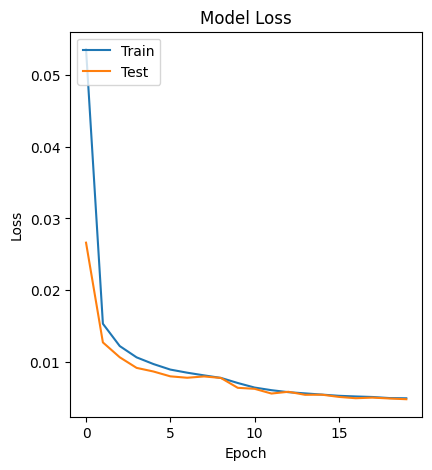

In [20]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))

# Set the figsize parameter to make the plot view bigger
plt.subplot(1, 2, 1)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

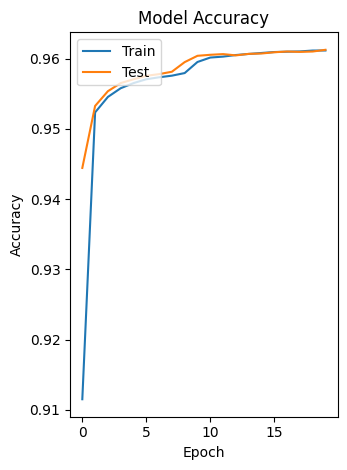

In [21]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Model Evaluation


In [22]:
# Calculate accuracy
train_loss, train_accuracy = model.evaluate(X_train, y_train)
val_loss, val_accuracy = model.evaluate(X_val, y_val)

359/359 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9616 - loss: 0.0044
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9605 - loss: 0.0054


In [23]:
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Train Accuracy: 0.9615669250488281
Validation Accuracy: 0.9612426161766052


In [24]:
# Reshape y_test_reshaped to a 2D array
y_test_reshaped = np.array([]).reshape(-1, 1)

# Reshape y_pred_reshaped to a 2D array
y_pred_reshaped = np.array([]).reshape(-1, 1)

In [25]:
# Perform one-hot encoding on y_test_reshaped and y_pred_reshaped
label_binarizer = MultiLabelBinarizer()
y_test_binarized = label_binarizer.fit_transform(y_test_reshaped)
y_pred_binarized = label_binarizer.transform(y_pred_reshaped)

## Model Saving


In [26]:
# Freeze layers since training is done
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')

# Save model architecture and weights
model.save('full_CNN_model.h5')

# Show summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 80, 160, 3)        │         12 │
│ (BatchNormalization)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Conv1 (Conv2D)                  │ (None, 78, 158, 8)        │        224 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Conv2 (Conv2D)                  │ (None, 76, 156, 16)       │      1,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 38, 78, 16)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Conv3 (Conv2D)                  │ (None, 36, 76, 16)        │      2,320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 36, 76, 16)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Conv4 (Conv2D)                  │ (None, 34, 74, 32)        │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 74, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Conv5 (Conv2D)                  │ (None, 32, 72, 32)        │      9,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 72, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 36, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Conv6 (Conv2D)                  │ (None, 14, 34, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 34, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Conv7 (Conv2D)                  │ (None, 12, 32, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 32, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 16, 64)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 12, 32, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Deconv1 (Conv2DTranspose)       │ (None, 14, 34, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 34, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Deconv2 (Conv2DTranspose)       │ (None, 16, 36, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 36, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 72, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ Deconv3 (Conv2DTranspose)       │ (None, 34, 74, 32)        │     18,464 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ (None, 34, 74, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼──────────

 Total params: 181,693 (709.74 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 181,693 (709.74 KB)

## Model Loading


In [27]:
# Load the trained model
model = load_model('full_CNN_model.h5')

## Inference and Visualization


In [28]:
# Predict the output for the validation data
y_pred = model.predict(X_val)

# Select 3 random images from the validation set
random_images = np.random.choice(range(len(X_val)), 3, replace=False)

 4/40 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step


## Visualization


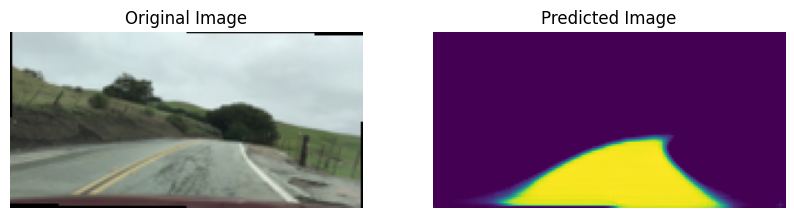

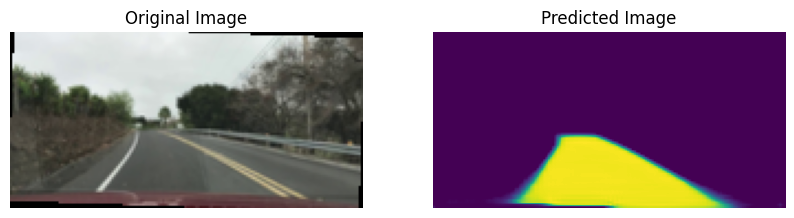

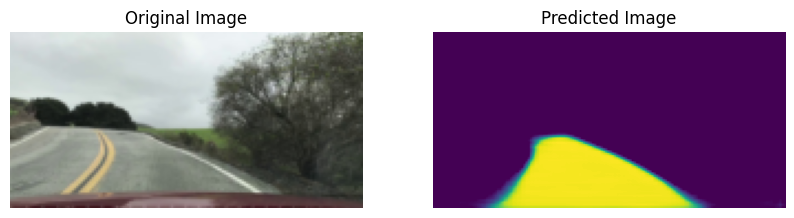

In [29]:
# Plot the selected images and their predictions
for i in random_images:
    
    # Set the figsize parameter to make the plot view bigger
    plt.figure(figsize=(10, 5))  

    plt.subplot(1, 2, 1)
    plt.imshow(X_val[i])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(y_pred[i].reshape(input_shape[:2]))
    plt.title('Predicted Image')
    plt.axis('off')

    plt.show()

## Curve Detection and Analysis


In [30]:
def detect_curve(image):
    
    # Simple curve detection: Non-zero pixels represent the curve
    return image != 0

In [31]:
def measure_length(detected_curve):
    
    # Measure the length of the curve in pixels
    return np.sum(detected_curve)

In [32]:
# number of pixels per centimeter in your images.
scale = 100

Length in Pixels: 2357


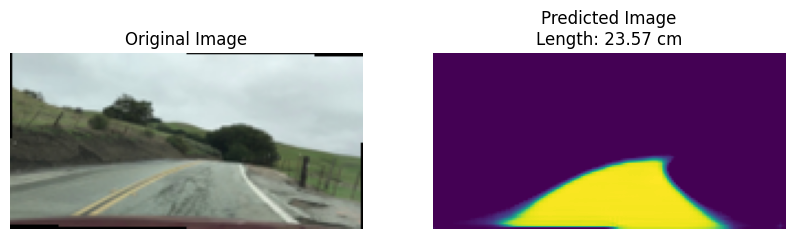

Length in Pixels: 2276


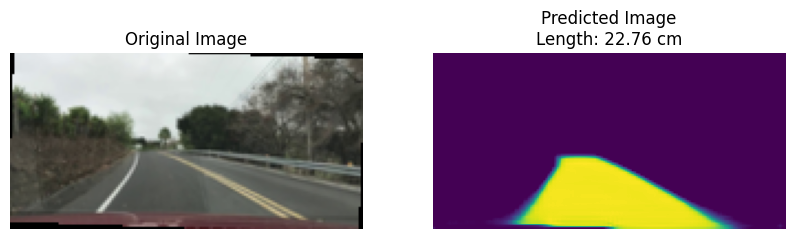

Length in Pixels: 2151


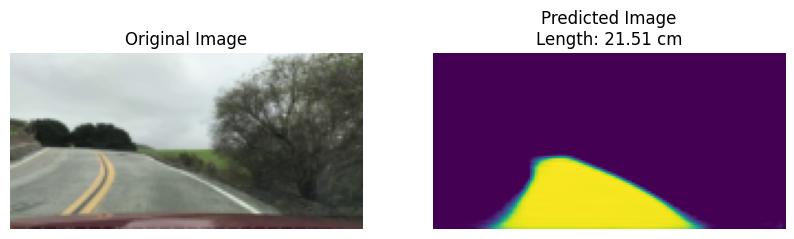

In [33]:
# For each randomly selected image
for i in random_images:
    plt.figure(figsize=(10, 5))
    
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(X_val[i])
    plt.title('Original Image')
    plt.axis('off')

    # Get the predicted curve
    curve = y_pred[i].reshape(input_shape[:2])

    # Detect the curve in the image
    detected_curve = detect_curve(curve)
    
    # Measure the length of the curve in pixels
    length_pixels = measure_length(detected_curve)
    print("Length in Pixels:", length_pixels)  # Debugging print statement

    # Convert the length to cm
    length_cm = length_pixels / scale

    # Display the predicted curve along with its measured length
    plt.subplot(1, 2, 2)
    plt.imshow(curve)
    plt.title('Predicted Image\nLength: {} cm'.format(length_cm))
    plt.axis('off')

    plt.show()

## Image Preprocessing and Prediction


In [34]:
image_path = 'original_image_1.png' 
image = cv2.imread(image_path)

# Check if the image is empty
if image is None:
    print(f"Error: Failed to load the image at path {image_path}")
else:
    # Resize to the input size that your model expects
    image = cv2.resize(image, (224, 224))  
    
    # Scale pixel values to [0, 1]
    image = image / 255.0 
    
    # Add an extra dimension for the batch size
    image = np.expand_dims(image, axis=0)  

    # Use the model to make a prediction
    prediction = model.predict(image)

    # Print the prediction
    print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
[[[[0.00945479]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.0562369 ]
   [0.00292361]
   [0.00801849]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.10093798]
   [0.05113409]
   [0.02118753]]

  [[0.0643531 ]
   [0.        ]
   [0.        ]
   ...
   [0.06067725]
   [0.        ]
   [0.004636  ]]]]


## User Interaction - Drawing Circles


In [44]:
# Define the callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Mouse coordinates: ({}, {})".format(x, y))
        cv2.circle(img, (x, y), 10, (0, 255, 0), -1)

# List of image paths
image_paths = ['original_image_1.png', 'original_image_2.png', 'original_image_3.png']

# Randomly select an image path
selected_path = random.choice(image_paths)

# Read the image
img = cv2.imread(selected_path)

# Resize the image to a larger size
img = cv2.resize(img, (800, 600))

# Create a window and set the callback function
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while True:
    cv2.imshow('image', img)
    
    # Press ESC to exit
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [45]:
# List of image paths
image_paths = ['original_image_1.png', 'original_image_2.png', 'original_image_3.png']

# Randomly select an image path
selected_path = random.choice(image_paths)

# Read the image
image = cv2.imread(selected_path)

In [46]:
# Check if the image is empty
if image is None:
    print(f"Error: Failed to load the image at path {selected_path}")
else:
    # Resize to the input size that your model expects
    processed_image = cv2.resize(image, (224, 224))  
    
    # Scale pixel values to [0, 1]
    processed_image = processed_image / 255.0  
    
    # Add an extra dimension for the batch size
    processed_image = np.expand_dims(processed_image, axis=0)  

In [47]:
# Convert the image back to 8-bit representation
processed_image = cv2.convertScaleAbs(image)

In [48]:
# Manually specify the coordinates of the lanes
lane_coordinates = [
    [(87, 45), (98, 51), (121, 68), (127, 74)],
    [(34, 75), (40, 69), (59, 57), (70, 47)]
]

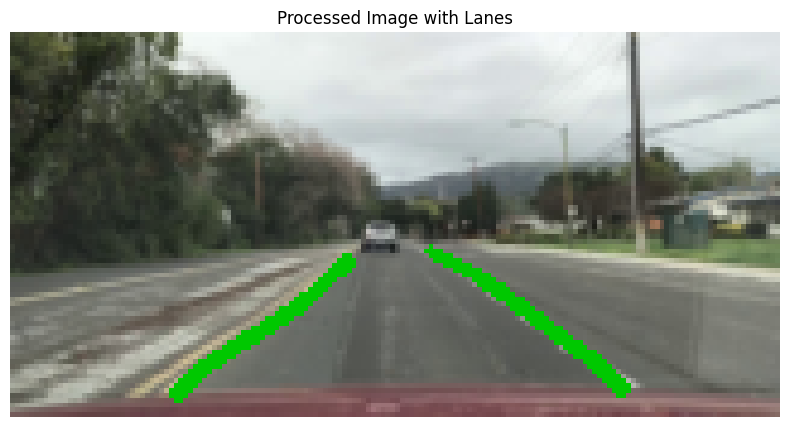

In [50]:
# Draw lines on the processed image to represent lanes
for line_coordinates in lane_coordinates:
    for i in range(len(line_coordinates) - 1):
        cv2.line(processed_image, line_coordinates[i], line_coordinates[i+1], (0, 200, 0), thickness=2)

# Plot the processed image with the drawn lanes
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title('Processed Image with Lanes')
plt.axis('off')
plt.show()

# Analyzation of the Code:

## 1. Neural Network Model

- The neural network model architecture is designed for image segmentation tasks using convolutional and deconvolutional layers.
- Batch normalization is used for normalization, and the ReLU activation function is applied after each convolutional layer.
- The model is compiled using the Adam optimizer and mean squared error as the loss function.

## 2. Training the Model

- The training data is loaded from pickle files (`full_CNN_labels.p` and `full_CNN_train.p`).
- The data is preprocessed, normalized, and split into training and validation sets.
- The model is trained using the `fit` method, specifying batch size, number of epochs, and validation data.
- Training progress is monitored using accuracy and loss metrics for both training and validation sets.

## 3. Training Progress (Epochs 1-20)

- The accuracy and loss values for each epoch are printed.
- The model's performance improves over epochs, as seen by decreasing loss and increasing accuracy for both training and validation sets.
- Training accuracy reaches approximately 96%, and validation accuracy reaches around 96.1%.
- The loss decreases, indicating that the model is learning the patterns in the data.

## 4. Visualization of Training History

- A plot is generated to visualize the training and validation loss over epochs.
- Another plot shows the training and validation accuracy over epochs.
- Both plots indicate that the model is learning well and not overfitting.

## 5. Model Evaluation

- The final accuracy is evaluated on both the training and validation sets.
- Training Accuracy: 96.16%
- Validation Accuracy: 96.12%

## 6. Saving and Loading the Model

- The trained model is saved to a file named 'full_CNN_model.h5'.
- The model summary is displayed.
- The saved model is loaded using `load_model` from `keras.models`.

## 7. Prediction on Validation Images

- Random images from the validation set are selected.
- The original images and the corresponding predicted images are displayed side by side.

## 8. Curve Detection and Measurement

- A function for curve detection (`detect_curve`) is provided.
- The length of the detected curve in pixels is measured using the `measure_length` function.
- The length is then converted to centimeters.

## 9. Testing on External Image

- An external image ('original_image_1.png') is loaded and preprocessed.
- The preprocessed image is fed to the model for prediction.

## 10. Interactive Image Annotation

- An interactive script allows the user to draw circles on an image by clicking the left mouse button.
- The script uses OpenCV and provides the coordinates of the clicked points.

## 11. Lane Detection Visualization

- Lane coordinates are manually specified, and lines are drawn on an image to represent lanes.
- The processed image is then displayed.

**Observations:**

- The model demonstrates good performance on the training and validation sets, achieving high accuracy and low loss.
- The visualization of training history suggests that the model is learning effectively without overfitting.
- The provided functions for curve detection, length measurement, and lane visualization add flexibility for further analysis.
- The interactive image annotation script and lane detection visualization are useful tools for understanding model outputs and experimenting with real-world scenarios.
